Notebook em **R** que mostra procedimentos para a obtenção de uma **Regressão Linear** a partir de um exemplo do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)**

<!-- TEASER_END -->

# Exemplos do livro Six Sigma: A Complete Step-by-Step Guide

![Six Sigma: A Complete Step-by-Step Guide](https://raw.githubusercontent.com/vstram/SixSigmaInR/master/book_cover-small.jpg)

## Conteúdo:
* [Exercício](#Exercício)
* [Procedimento](#Procedimento)
* [Solução Alternativa](#Solução-Alternativa)
* [Referências](#Referências)

## Exercício

O exercício (pág 213) comenta sobre a utilização do Gráfico de Pareto para identificar as principais causas de um problema. Apresenta uma tabela com recusas de serviço médico para diferentes clientes (A, B, C, ...). É plotado um gráfico de barras, ordenado de forma decrescente, a partir dos dados desta tabela. Por sobre este gráfico, é mostrado o uso de uma função denominada `glm` -- Generalized Linear Model, usada para traçar uma **regressão linear**.

Para mim não ficou claro o objetivo desta regressão no exercício em questão. Usualmente, uma regressão linear é utilizada para modelar um problema em que há uma relação proporcional entre duas variáveis: uma dependente (resposta) e uma independente (informação). O objetivo seria estimar a resposta em situações em que a informação de entrada é conhecida ou está sob controle. Ex. qual seria a quantidade estimada de pessoas atendidas se fosse contratado mais um médico em uma clínica. Enfim, fica como **exemplo de como obter e plotar esta regressão linar com o R**.

## Procedimento

In [7]:
# define um tamanho padrão para o gráfico
options(repr.plot.width=16, repr.plot.height=8) 

### Carregar os dados a partir do arquivo CSV

In [2]:
data <- read.csv("ch14p213.txt", header=TRUE)
data

Payer,Denials
<chr>,<int>
A,3512
B,2779
C,1575
D,1142
E,945
F,847
G,702
H,502
Others,2141


### Plotar os dados no gráfico

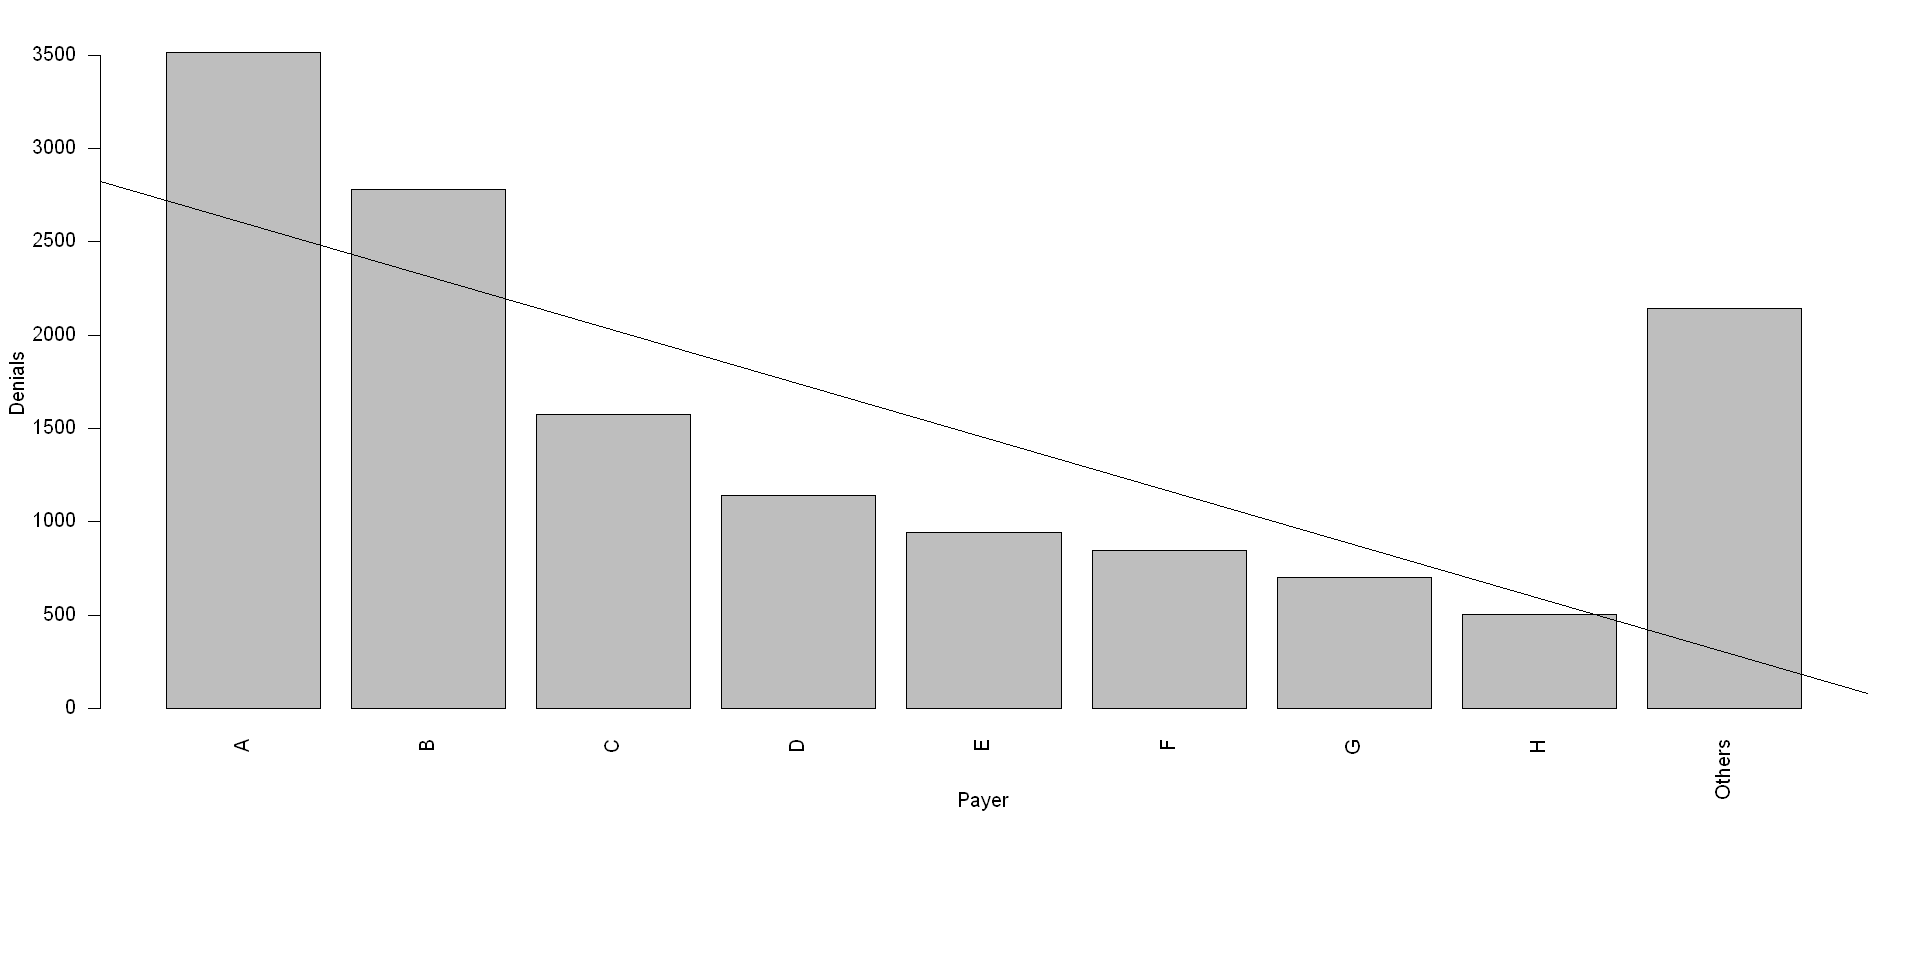

In [3]:
# define as margens do gráfico
par(mar = c(10, 4, 2, 2) + 0.2)

# cria o gráfico de barras a partir dos dados
barplot(
    data$Denials, 
    ylab="Denials", 
    xlab="Payer", 
    names.arg=data$Payer, 
    las=2
)

# calcula a regressão linear
fit <- glm(
    # formula usada: 'Denials' versus 'Payers'. Como 'Payers' é um str, criou-se um array com 
    # valores inteiros representando cada dado ( 1: 'A', 2: 'B', ...)
    data$Denials ~ seq(1, length(data$Denials)) 
)

# plota a regressão linear sobre o gráfico
abline(fit);

Podemos inspecionar o conteúdo da variavel `fit` e observar os valores do coeficiente angular da linha `-239.3` e o coeficiente linear `2768.0`

In [4]:
fit


Call:  glm(formula = data$Denials ~ seq(1, length(data$Denials)))

Coefficients:
                 (Intercept)  seq(1, length(data$Denials))  
                      2768.0                        -239.3  

Degrees of Freedom: 8 Total (i.e. Null);  7 Residual
Null Deviance:	    8550000 
Residual Deviance: 5115000 	AIC: 150.8

## Solução Alternativa

Mesmo resultado, desta vez usando a biblioteca `ggplot2`, que permite gerar gráficos com mais qualidade visual.

In [5]:
# Importa as bibliotecas necessárias
library(ggplot2)

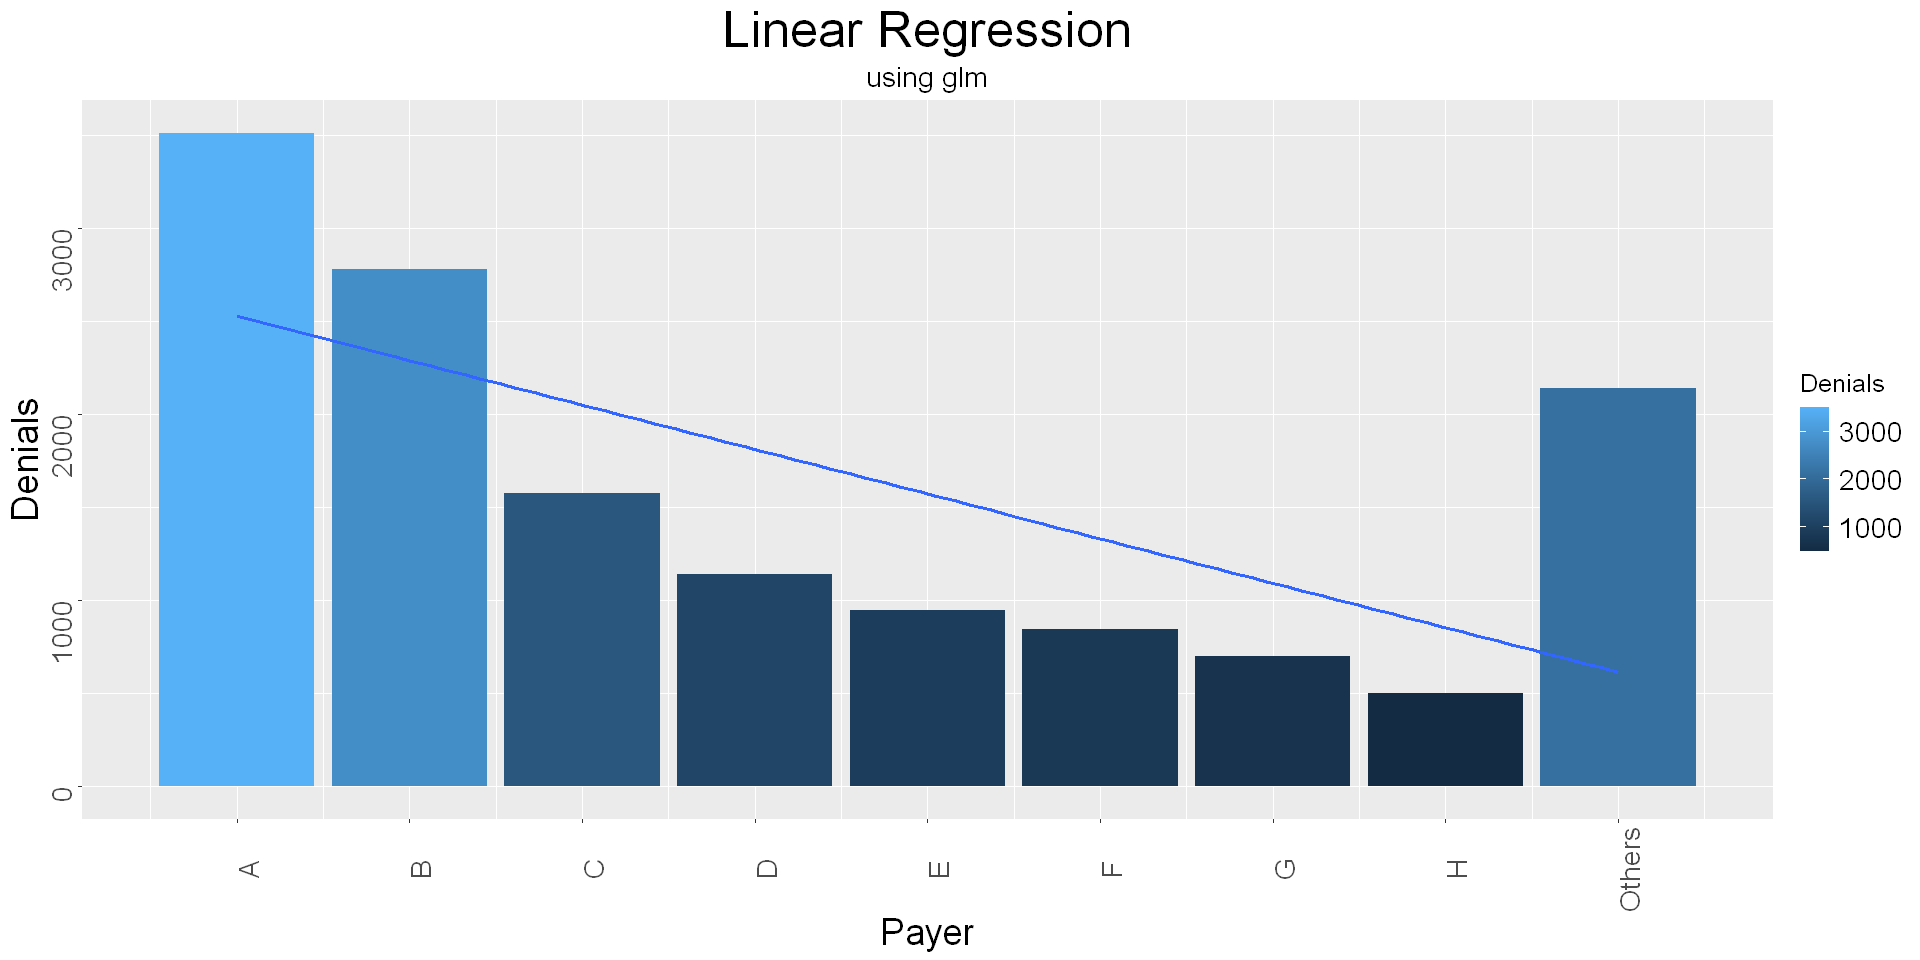

In [6]:
ggplot(
    data, 
    aes(x=seq(1, length(Denials)), y=Denials)
) +
geom_bar(
    stat = "identity",
    aes(fill = Denials)
) +
scale_x_continuous(
    breaks=seq(1, length(data$Payer)),
    labels=data$Payer
) +
geom_smooth(
    formula = y ~ x, 
    method = "glm", 
    se = FALSE
) +
labs(
    title="Linear Regression",
    subtitle = "using glm",
    x="Payer", 
    y = "Denials"
) + 
theme(
    plot.title = element_text(size=30, hjust = 0.5), # define tamanho e alinhamento do título
    plot.subtitle = element_text(size=17, hjust = 0.5), # define tamanho e alinhamento do subtítulo
    axis.text = element_text(size=17, angle = 90), # define tamanho e orientação texto do eixo
    axis.title = element_text(size=22),# define tamanho do título do eixo
    legend.text = element_text(size=17), # define tamanho da legenda
    legend.title = element_text(size=15), # define tamanho do titulo da legenda
)

Observe que na solução apresentada acima, a regressão linear é adicionada através da função `geom_smooth`.

## Referências

Este notebook contém exemplos do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)** disponibilizado pelo [The Council for Six Sigma Certification](https://www.sixsigmacouncil.org/six-sigma-training-material/)

Consulte:
* [R Docs - glm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/glm)